In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'customer-segmentation-tutorial-in-python' dataset.
Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [ ]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv(f'{path}/Mall_Customers.csv')
display(mall_data.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Data Exploration
print("Dataset Information:")
print(df.info())  # Display basic info (types, null values)
print("\nFirst few rows of the dataset:")
print(df.head())  # Show first few rows
print("\nSummary statistics:")
print(df.describe())  # Summary statistics

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

First few rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      4

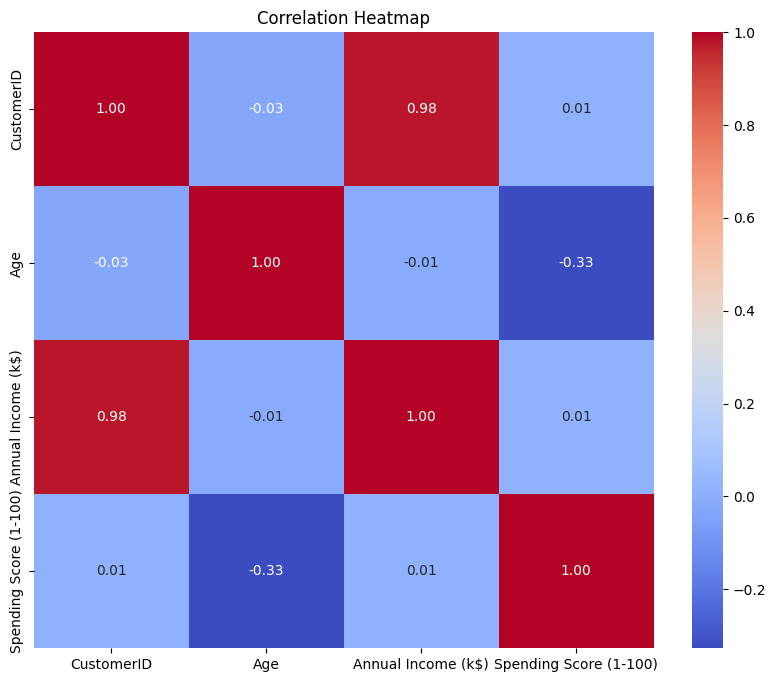

In [ ]:
# Visualizing correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Data Preprocessing: Handling missing values and scaling features
# Handle missing values - Impute missing numerical values with mean
numerical_cols = mall_data.select_dtypes(include=np.number).columns
mall_data[numerical_cols] = mall_data[numerical_cols].fillna(mall_data[numerical_cols].mean())

# Select features for clustering (e.g., Annual Income and Spending Score)
features = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

display(scaled_features)

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [ ]:
# Use PCA for dimensionality reduction to visualize high-dimensional data
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)

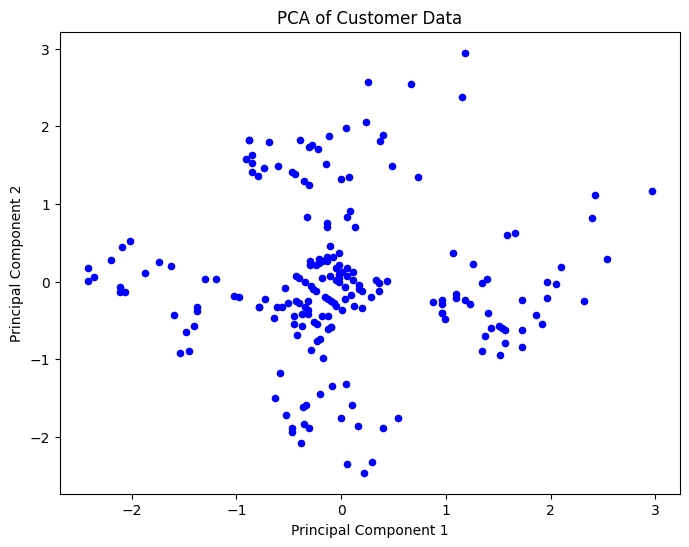

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue', s=20)
plt.title('PCA of Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# k-Means Clustering: Using the Elbow Method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

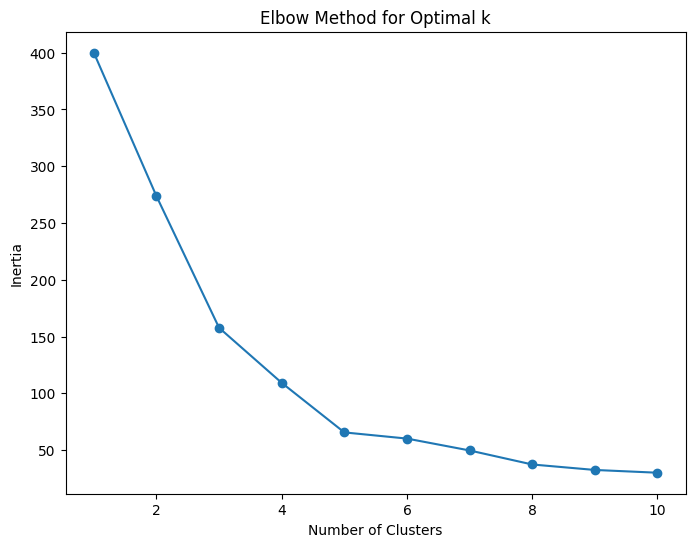

In [ ]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# From the Elbow plot, select the optimal k value (e.g., k=4)
optimal_k = 4

# Apply k-Means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

In [ ]:
# Add cluster labels to the dataframe
df['Cluster'] = kmeans_labels

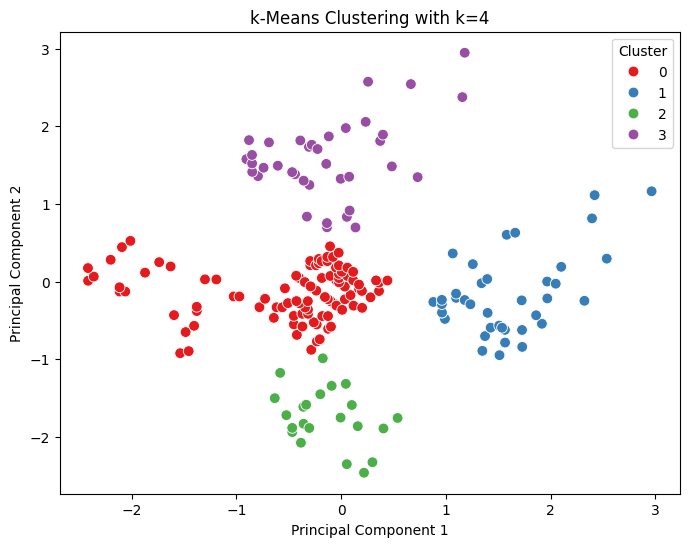

In [ ]:
# Visualizing the clusters using PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'],
palette='Set1', s=60)
plt.title(f'k-Means Clustering with k={optimal_k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Model Comparison: Experimenting with other clustering algorithms (Gaussian Mixture)
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(scaled_features)

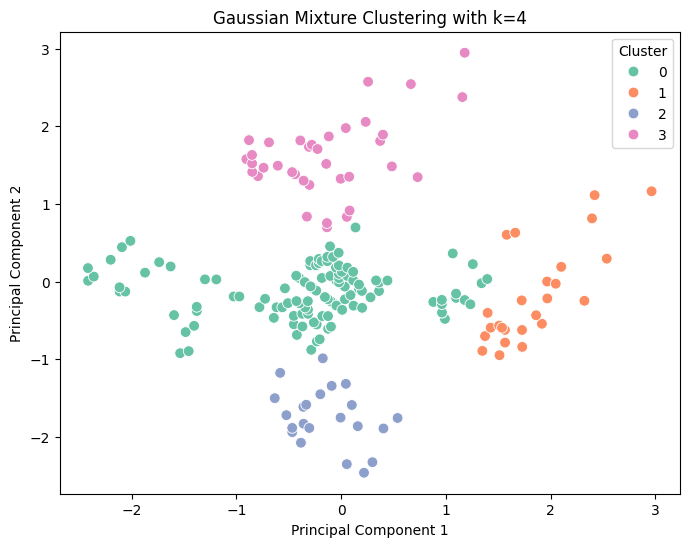

In [ ]:
# Visualizing Gaussian Mixture Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=gmm_labels,
palette='Set2', s=60)
plt.title(f'Gaussian Mixture Clustering with k={optimal_k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Model Evaluation: Comparing Silhouette Scores for k-Means and Gaussian Mixture
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
gmm_silhouette = silhouette_score(scaled_features, gmm_labels)

In [ ]:
print("\nSilhouette Score for k-Means:", kmeans_silhouette)
print("Silhouette Score for Gaussian Mixture:", gmm_silhouette)


Silhouette Score for k-Means: 0.49434988482196784
Silhouette Score for Gaussian Mixture: 0.41339168343976207


In [ ]:
# Conclusion: Based on silhouette scores and visualizations, choose the best model
if kmeans_silhouette > gmm_silhouette:
    print("\nk-Means is the better model based on Silhouette Score.")
else:
    print("\nGaussian Mixture is the better model based on Silhouette \
Score.")


k-Means is the better model based on Silhouette Score.
